In [1]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [4]:
my_data=pd.read_csv("DATASET of AYURVEDA .csv", delimiter=",")

In [5]:
my_data[0:5]

,Indications 1,Indications 2,Indications 3,Indications 4,Name of\nMedicine
0,Arsha,Agnimandya,Udararoga,Vibandha,Abhayarishta
1,SarvaJvara,Jirna Jvara,NaN,NaN,Amritarishta
2,Kandu,Tvak Vikara,Vibandha,NaN,Aragvadharishta
3,Balaroga,Balakshaya,NaN,NaN,Aravindasava
4,Hridroga,Hriddrava,Hrid-daurbalya,Moha,Arjunarishta/\nParthadyarishta


In [6]:
duplicate = my_data.duplicated()
 
print("Duplicate Rows :")
 
# Displaying the resultant Dataframe
duplicate

Duplicate Rows :


0        False
1        False
2        False
3        False
4        False
         ...  
10395     True
10396     True
10397     True
10398     True
10399     True
Length: 10400, dtype: bool

In [7]:
duplicate_rows = my_data[my_data.duplicated()]
print("Duplicate Values :", len(duplicate_rows))

Duplicate Values : 10200


In [8]:
duplicate_vals = my_data.drop_duplicates()
duplicate_vals

,Indications 1,Indications 2,Indications 3,Indications 4,Name of\nMedicine
0,Arsha,Agnimandya,Udararoga,Vibandha,Abhayarishta
1,SarvaJvara,Jirna Jvara,NaN,NaN,Amritarishta
2,Kandu,Tvak Vikara,Vibandha,NaN,Aragvadharishta
3,Balaroga,Balakshaya,NaN,NaN,Aravindasava
4,Hridroga,Hriddrava,Hrid-daurbalya,Moha,Arjunarishta/\nParthadyarishta
...,...,...,...,...,...
195,Jvara,Pratishyaya,Kasa,NaN,Tribhuvankirti Rasa
196,Vata Roga,Avabahuka,Urustambha,Pakshaghata,Vatagajankusha Rasa
197,Vatajashula,Sutika Vata,Grahaniroga,NaN,Vatavidhavansan\nRasa
198,Pandu,Kamala,Hridroga,NaN,Navayasa Lauha


In [9]:
my_data.shape

(10400, 5)

In [10]:
X = my_data[["Indications 1","Indications 2","Indications 3","Indications 4"]].values
X[0:5]

array([['Arsha', 'Agnimandya', 'Udararoga', 'Vibandha'],
       ['SarvaJvara', 'Jirna Jvara', nan, nan],
       ['Kandu', 'Tvak Vikara', 'Vibandha', nan],
       ['Balaroga', 'Balakshaya', nan, nan],
       ['Hridroga', 'Hriddrava', 'Hrid-daurbalya', 'Moha']], dtype=object)

In [11]:
my_data.isnull().sum()

Indications 1           0
Indications 2        1404
Indications 3        6084
Indications 4        8060
Name of\nMedicine       0
dtype: int64

In [12]:
my_data["Indications 2"].fillna("ffill",inplace = True)
my_data["Indications 3"].fillna("ffill",inplace = True)
my_data["Indications 4"].fillna("ffill",inplace = True)
my_data

,Indications 1,Indications 2,Indications 3,Indications 4,Name of\nMedicine
0,Arsha,Agnimandya,Udararoga,Vibandha,Abhayarishta
1,SarvaJvara,Jirna Jvara,ffill,ffill,Amritarishta
2,Kandu,Tvak Vikara,Vibandha,ffill,Aragvadharishta
3,Balaroga,Balakshaya,ffill,ffill,Aravindasava
4,Hridroga,Hriddrava,Hrid-daurbalya,Moha,Arjunarishta/\nParthadyarishta
...,...,...,...,...,...
10395,Jvara,Pratishyaya,Kasa,ffill,Tribhuvankirti Rasa
10396,Vata Roga,Avabahuka,Urustambha,Pakshaghata,Vatagajankusha Rasa
10397,Vatajashula,Sutika Vata,Grahaniroga,ffill,Vatavidhavansan\nRasa
10398,Pandu,Kamala,Hridroga,ffill,Navayasa Lauha


In [13]:
my_data.isnull().sum()

Indications 1        0
Indications 2        0
Indications 3        0
Indications 4        0
Name of\nMedicine    0
dtype: int64

In [14]:
X = my_data[["Indications 1","Indications 2","Indications 3","Indications 4"]].values
X[0:5]

array([['Arsha', 'Agnimandya', 'Udararoga', 'Vibandha'],
       ['SarvaJvara', 'Jirna Jvara', 'ffill', 'ffill'],
       ['Kandu', 'Tvak Vikara', 'Vibandha', 'ffill'],
       ['Balaroga', 'Balakshaya', 'ffill', 'ffill'],
       ['Hridroga', 'Hriddrava', 'Hrid-daurbalya', 'Moha']], dtype=object)

In [15]:
y = my_data["Name of\nMedicine"]
y

0                          Abhayarishta
1                          Amritarishta
2                       Aragvadharishta
3                          Aravindasava
4        Arjunarishta/\nParthadyarishta
                      ...              
10395               Tribhuvankirti Rasa
10396               Vatagajankusha Rasa
10397             Vatavidhavansan\nRasa
10398                    Navayasa Lauha
10399                  Saptamrita Lauha
Name: Name of\nMedicine, Length: 10400, dtype: object

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
import numpy as np
# set random seed for reproducibility
np.random.seed(42)


# load your data
X = my_data[["Indications 1","Indications 2","Indications 3","Indications 4"]].values# your feature data
y = my_data["Name of\nMedicine"].values # your target data

In [18]:
y

array(['Abhayarishta', 'Amritarishta', 'Aragvadharishta', ...,
       'Vatavidhavansan\nRasa', 'Navayasa Lauha', 'Saptamrita Lauha'],
      dtype=object)

In [19]:
X

array([['Arsha', 'Agnimandya', 'Udararoga', 'Vibandha'],
       ['SarvaJvara', 'Jirna Jvara', 'ffill', 'ffill'],
       ['Kandu', 'Tvak Vikara', 'Vibandha', 'ffill'],
       ...,
       ['Vatajashula', 'Sutika Vata', 'Grahaniroga', 'ffill'],
       ['Pandu', 'Kamala', 'Hridroga', 'ffill'],
       ['Timira', 'Drishtimandya', 'ffill', 'ffill']], dtype=object)

In [20]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
my_data["Indications 1"]=label_encoder.fit_transform(my_data['Indications 1'])
my_data["Indications 2"]=label_encoder.fit_transform(my_data['Indications 2'])
my_data["Indications 3"]=label_encoder.fit_transform(my_data['Indications 3'])
my_data["Indications 4"]=label_encoder.fit_transform(my_data['Indications 4'])
X[:,0]=my_data["Indications 1"]
X[:,1]=my_data["Indications 2"]
X[:,2]=my_data["Indications 3"]
X[:,3]=my_data["Indications 4"]

X[0:5]

array([[13, 1, 54, 37],
       [81, 35, 65, 41],
       [43, 92, 61, 41],
       [20, 17, 65, 41],
       [37, 32, 20, 18]], dtype=object)

In [21]:
import warnings

# Ignoring User Warnings
warnings.simplefilter(action='ignore', category=UserWarning)

In [22]:
max_depth_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [23]:
from sklearn.model_selection import cross_val_score

for max_depth in max_depth_values:
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    scores = cross_val_score(model, X, y, cv=10)
    mean_score = scores.mean()
    print("max_depth = ", max_depth, ":", "mean accuracy = ", mean_score*100 )

max_depth =  1 : mean accuracy =  0.9615384615384615
max_depth =  2 : mean accuracy =  1.4423076923076923
max_depth =  3 : mean accuracy =  2.019230769230769
max_depth =  4 : mean accuracy =  2.5961538461538463
max_depth =  5 : mean accuracy =  3.2692307692307696
max_depth =  6 : mean accuracy =  4.134615384615384
max_depth =  7 : mean accuracy =  4.903846153846153
max_depth =  8 : mean accuracy =  5.769230769230769
max_depth =  9 : mean accuracy =  6.8269230769230775
max_depth =  10 : mean accuracy =  7.788461538461538


In [24]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=1)

In [25]:
train_data = pd.DataFrame(X_trainset)
train_data['target'] = y_trainset
train_data.to_csv('train_data.csv', index=False)

In [26]:
test_data = pd.DataFrame(X_testset)
test_data['target'] = y_testset
test_data.to_csv('test_data.csv', index=False)

In [27]:
print(X_trainset.shape)
print(y_trainset.shape)

(7280, 4)
(7280,)


In [28]:
print(X_testset.shape)
print(y_testset.shape)

(3120, 4)
(3120,)


In [29]:
test_data.isnull().values.any()

False

In [30]:
train_data.isnull().values.any()

False

In [31]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 10)
drugTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [32]:
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [33]:
predTree = drugTree.predict(X_testset)

In [34]:
train = drugTree.predict(X_trainset)

In [35]:
print (predTree [0:20])
print (y_testset [0:20])


['Sarpagandhaghana\nVati' 'Lavanabhaskara\nChurna/\nBhaskarlavan churna'
 'Arogyavardhini\nVati/Rasa' 'Lavangadi Vati' 'Arogyavardhini\nVati/Rasa'
 'Ushirasava' 'Dhanyapanchaka\nKashaya Churna' 'Pushyanuga Churna'
 'Kalyanaka Ghrita' 'Punarnava Guggulu' 'Kshirashatpala\nGhrita'
 'Kshirbala Taila /\nKshirbala Taila\nAvarti (Shatapaki)' 'Kumaryasava'
 'Pippalyadyasava' 'Prasarini Taila' 'Guduchi Churna' 'Phala Ghrita'
 'Shveta Malaham' 'Shvasakuthara Rasa' 'Kanchanara Guggulu']
['Sarpagandhaghana\nVati' 'Lavanabhaskara\nChurna/\nBhaskarlavan churna'
 'Arogyavardhini\nVati/Rasa' 'Lavangadi Vati' 'Arogyavardhini\nVati/Rasa'
 'Ushirasava' 'Dhanyapanchaka\nKashaya Churna' 'Pushyanuga Churna'
 'Kalyanaka Ghrita' 'Punarnava Guggulu' 'Kshirashatpala\nGhrita'
 'Kshirbala Taila /\nKshirbala Taila\nAvarti (Shatapaki)' 'Kumaryasava'
 'Pippalyadyasava' 'Prasarini Taila' 'Guduchi Churna' 'Phala Ghrita'
 'Shveta Malaham' 'Shvasakuthara Rasa' 'Kanchanara Guggulu']


In [36]:
from sklearn import metrics
import matplotlib.pyplot as plt
predictions_test =  metrics.accuracy_score(y_testset, predTree)
print("DecisionTrees's Testing Accuracy: ",predictions_test)

DecisionTrees's Testing Accuracy:  0.967948717948718


In [37]:
correct_labels=(predTree==y_testset).sum()
total_labels=y_testset.shape[0]
print("Testing Accuracy:",(correct_labels/total_labels))

Testing Accuracy: 0.967948717948718


In [38]:
from sklearn.metrics import accuracy_score
predictions_train = drugTree.predict(X_trainset)
Train_acc = accuracy_score(y_trainset,predictions_train)
print("DecisionTrees's Training Accuracy: ",Train_acc)

DecisionTrees's Training Accuracy:  0.9708791208791209


In [40]:
from sklearn.metrics import classification_report,confusion_matrix

In [41]:
print(classification_report(y_testset, predTree, zero_division = 1))
# Generating the confusion matrix for evaluating the testing corpus
conf_matrix = confusion_matrix(y_testset, predTree)
print("Confusion Matrix:")
print(conf_matrix)

                                                      precision    recall  f1-score   support

                                    Abhayadi Modakam       1.00      1.00      1.00        20
                                        Abhayarishta       1.00      1.00      1.00        19
                 Agastya Haritaki
/ Agastya
Rasayana       1.00      1.00      1.00        14
                                    Ajamodadi
Churna       1.00      1.00      1.00        14
                                        Akika Pishti       1.00      1.00      1.00        18
                                      Amalaki Churna       1.00      1.00      1.00        17
                                    Amritadi Guggulu       1.00      1.00      1.00        24
                                        Amritarishta       1.00      1.00      1.00        14
                                            Anutaila       1.00      1.00      1.00        18
                                      Apamarga Kshar       

In [42]:
print(classification_report(y_trainset,predictions_train, zero_division = 1))
# Generating the confusion matrix for evaluating the training corpus
from sklearn.metrics import confusion_matrix
 
predictions_train = drugTree.predict(X_trainset)
confusion_matrix_train = confusion_matrix(y_trainset, predictions_train)
print("Confusion matrix (training):\n", confusion_matrix_train)

                                                      precision    recall  f1-score   support

                                    Abhayadi Modakam       1.00      1.00      1.00        32
                                        Abhayarishta       1.00      1.00      1.00        33
                 Agastya Haritaki
/ Agastya
Rasayana       1.00      1.00      1.00        38
                                    Ajamodadi
Churna       1.00      1.00      1.00        38
                                        Akika Pishti       1.00      1.00      1.00        34
                                      Amalaki Churna       1.00      1.00      1.00        35
                                    Amritadi Guggulu       1.00      1.00      1.00        28
                                        Amritarishta       1.00      1.00      1.00        38
                                            Anutaila       1.00      1.00      1.00        34
                                      Apamarga Kshar       

In [43]:
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

Train score 0.9708791208791209
Test score 0.967948717948718


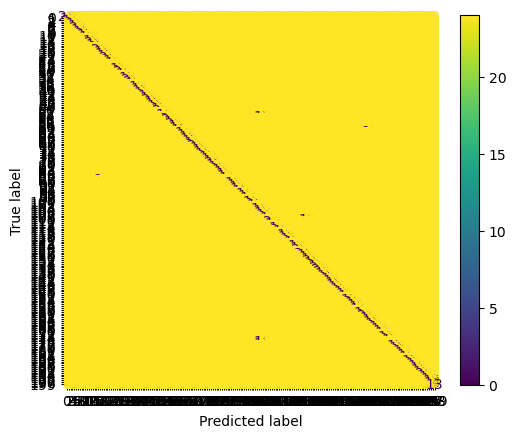

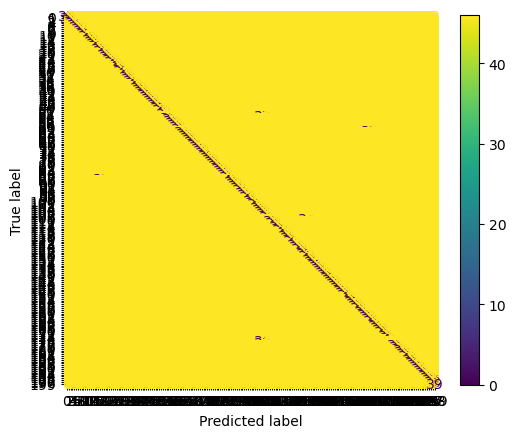

In [44]:
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
print(f'Train score {accuracy_score(train,y_trainset)}')
print(f'Test score {accuracy_score(predTree,y_testset)}')
conf_test = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
conf_train = ConfusionMatrixDisplay(confusion_matrix= confusion_matrix_train)
conf_test.plot()
conf_train.plot()

In [45]:
import pickle 
pickle.dump(drugTree, open('DecisionTree-Model.sav', 'wb'))  

In [46]:
import pickle 
pickle.dump(drugTree,open("model_N.pkl","wb"))

In [47]:
model = pickle.load(open("model_N.pkl","rb"))
model.predict(X_testset)

array(['Sarpagandhaghana\nVati',
       'Lavanabhaskara\nChurna/\nBhaskarlavan churna',
       'Arogyavardhini\nVati/Rasa', ..., 'Kalyanaka Ghrita',
       'Mukta Pishti', 'Mustakarishta'], dtype=object)

In [48]:
print(model.predict([[13, 1, 54, 37]]))

['Abhayarishta']
